### 1. Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:, 1: 2].values

In [5]:
training_set.shape

(1509, 1)

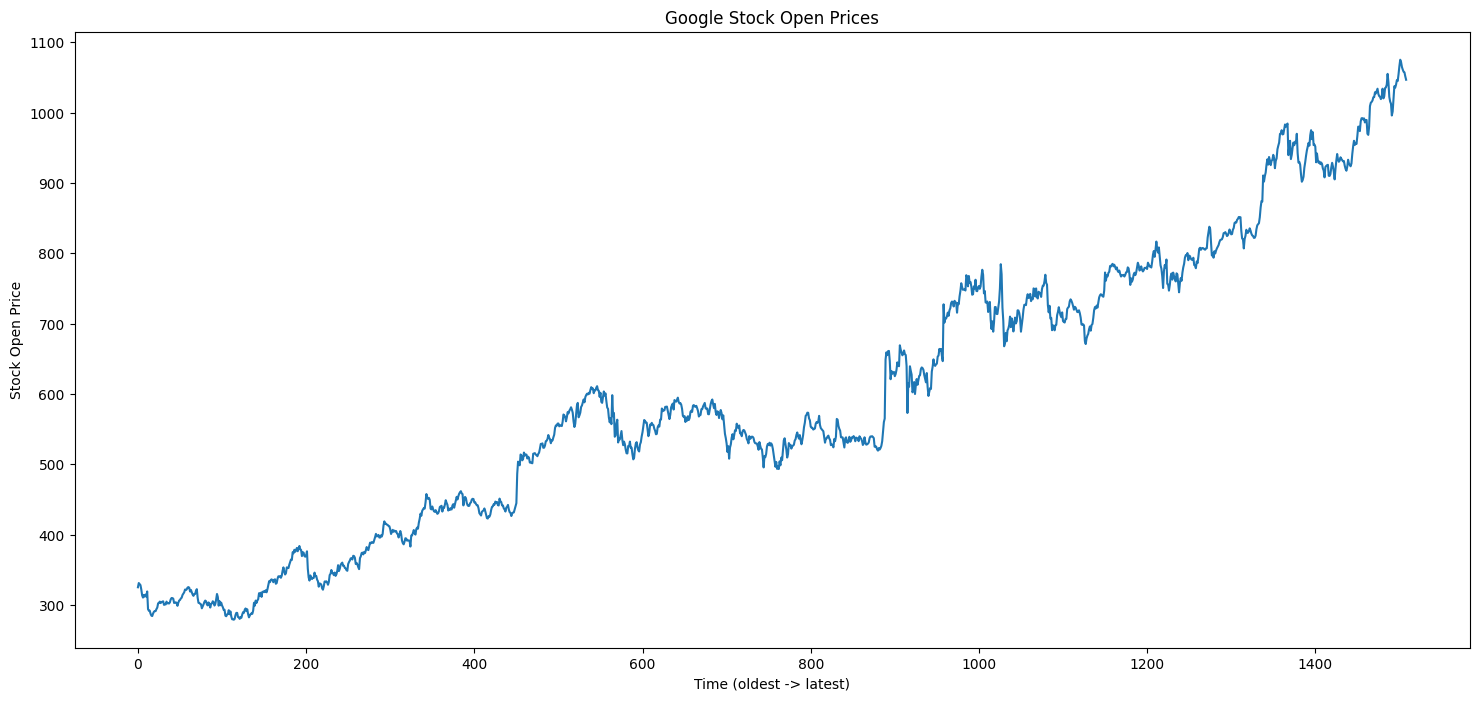

In [6]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1449, 60)

In [10]:
y_train.shape

(1449,)

In [11]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

C:\Users\yadne\AppData\Local\Temp\ipykernel_37512\2830194741.py:1: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  X_train = np.reshape(X_train, newshape =


In [12]:
X_train.shape

(1449, 60, 1)

In [13]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))
regressor.add(Dense(units = 1))

C:\Users\yadne\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 50)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - loss: 0.0471
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0044
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0044
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0044
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0035
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0032
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 0.0029
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0030
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0029
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0026
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0027
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0028
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0024
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0024
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [17]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [18]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [20]:
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [21]:
len(inputs)

185

In [22]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
X_test.shape

(125, 60, 1)

In [24]:
predicted_stock_price = regressor.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step


In [25]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

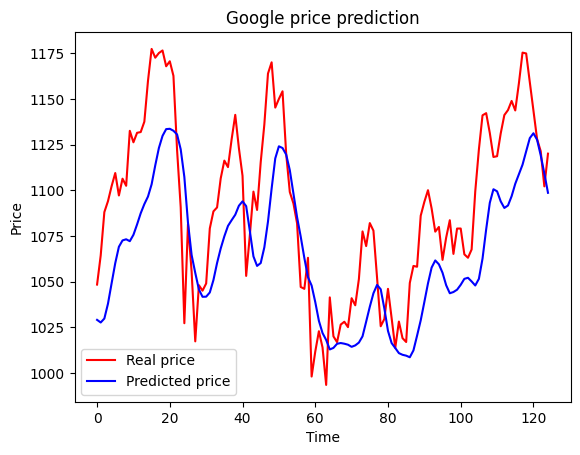

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()